In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 
import seaborn as sns
%matplotlib inline
from random import randint, choice, choices
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import load_wine
from scipy.stats import norm 
import statistics 

In [243]:
df = pd.DataFrame(load_wine().data)
df.columns = load_wine()['feature_names']
df['Wine_Type'] = load_wine().target

In [244]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine_Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<h2>Exploring Data</h2>

In [245]:
df.groupby('Wine_Type').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine_Type,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


<b>Every feature can be useful to classify a wine</b>

In [246]:
df.groupby('Wine_Type').count()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine_Type,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59
1,71,71,71,71,71,71,71,71,71,71,71,71,71
2,48,48,48,48,48,48,48,48,48,48,48,48,48


In [247]:
df0 = df[df['Wine_Type'] == 0]
df0.reset_index(drop=True, inplace=True)
df1 = df[df['Wine_Type'] == 1]
df1.reset_index(drop=True, inplace=True)
df2 = df[df['Wine_Type'] == 2]
df2.reset_index(drop=True, inplace=True)

In [248]:
dataframes = [df0, df1, df2]
labels = ['Wine Type 0', 'Wine Type 1', 'Wine Type 2']

<h2>Data Visualization</h2>

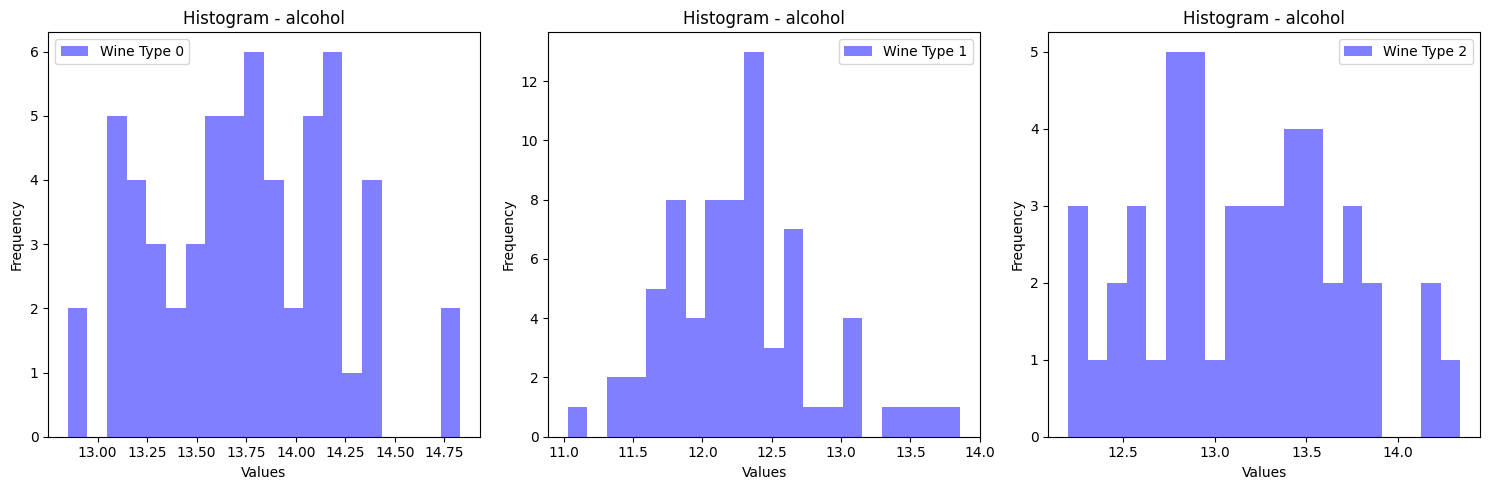

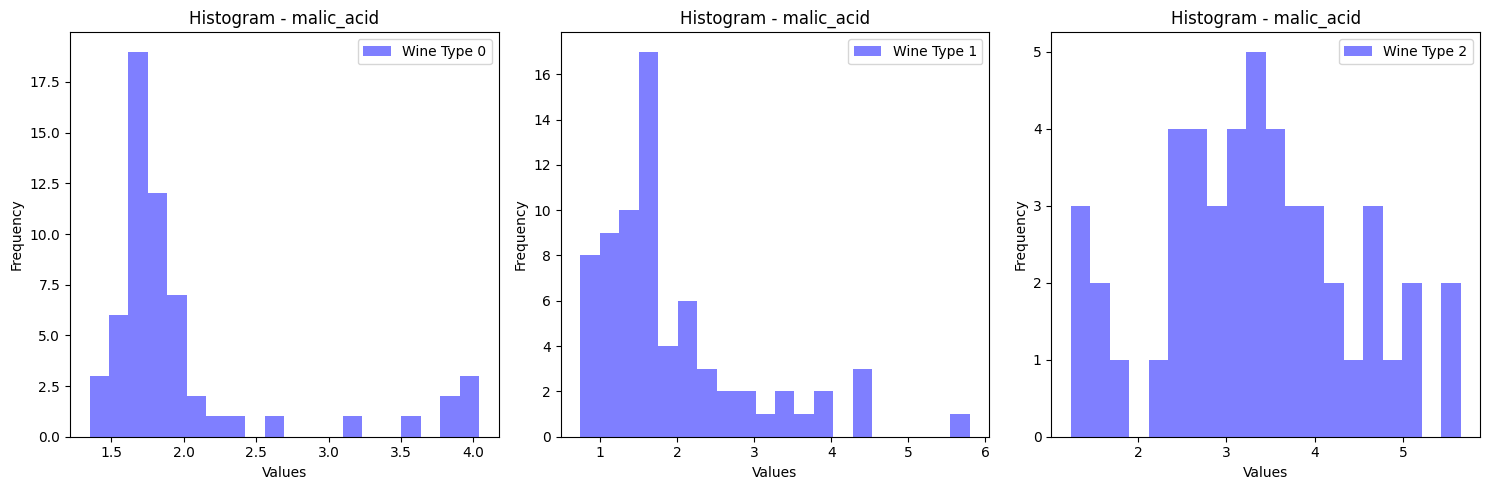

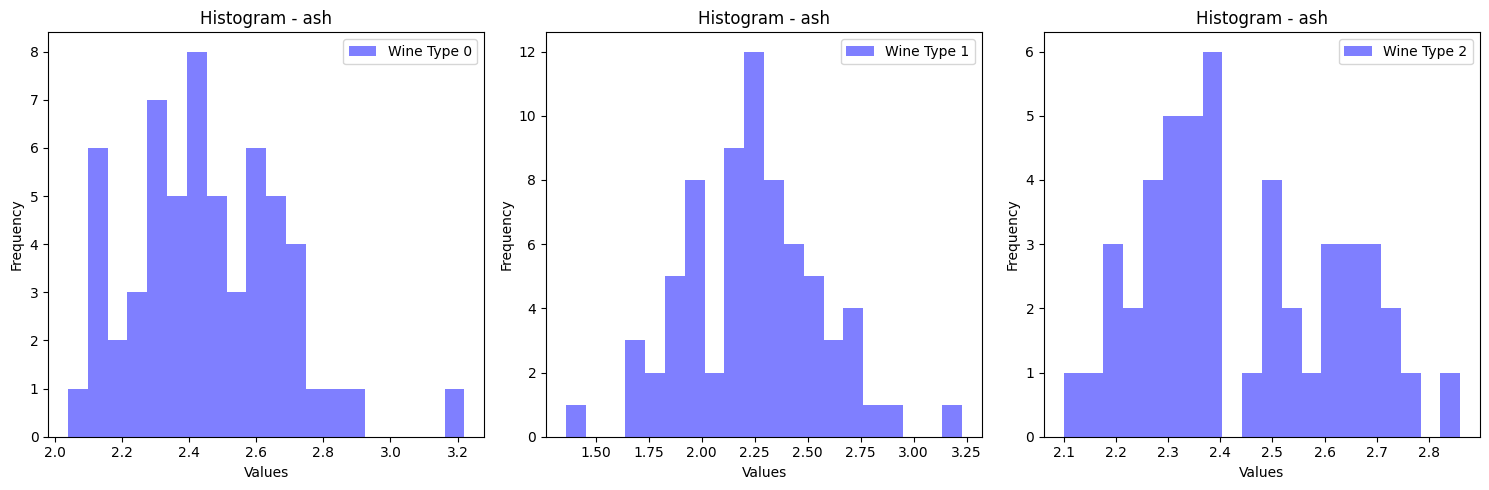

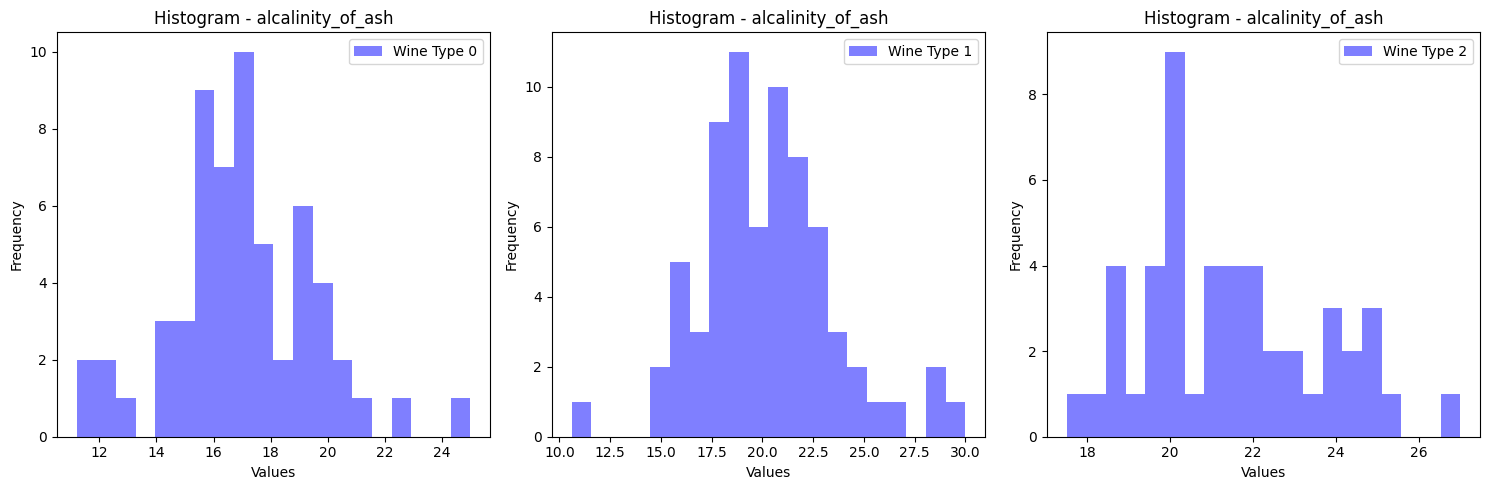

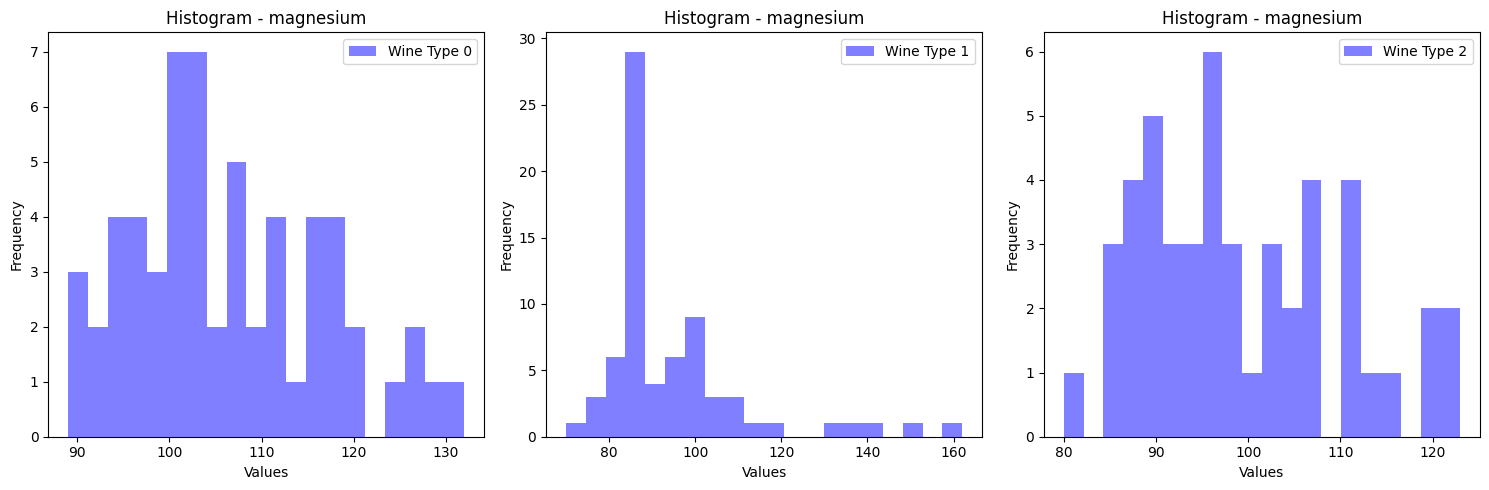

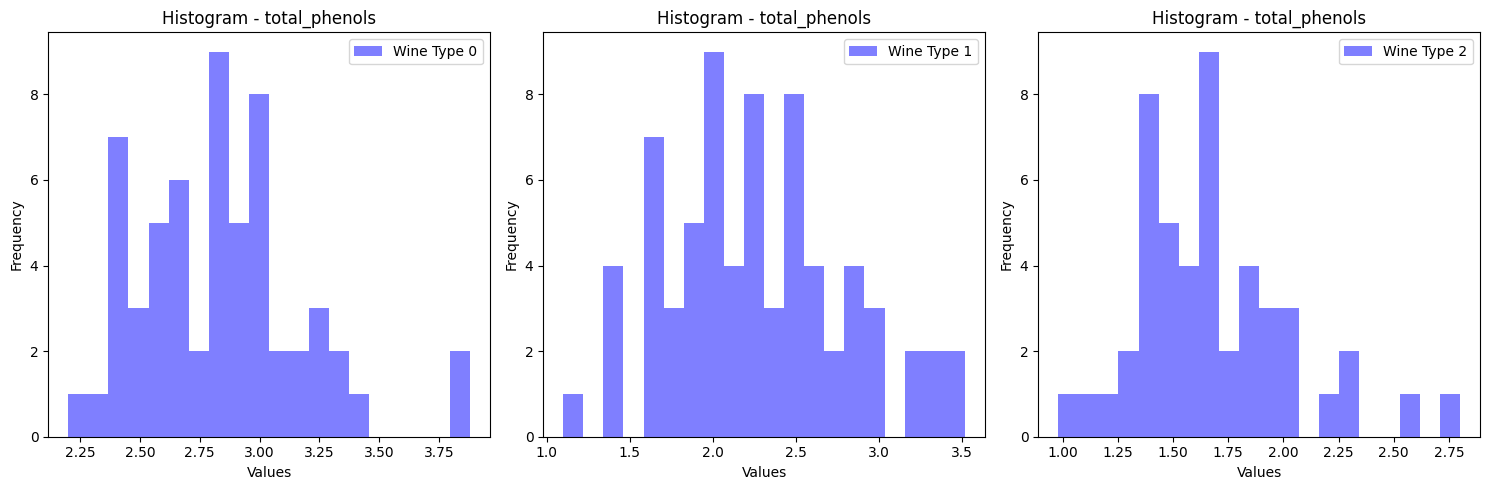

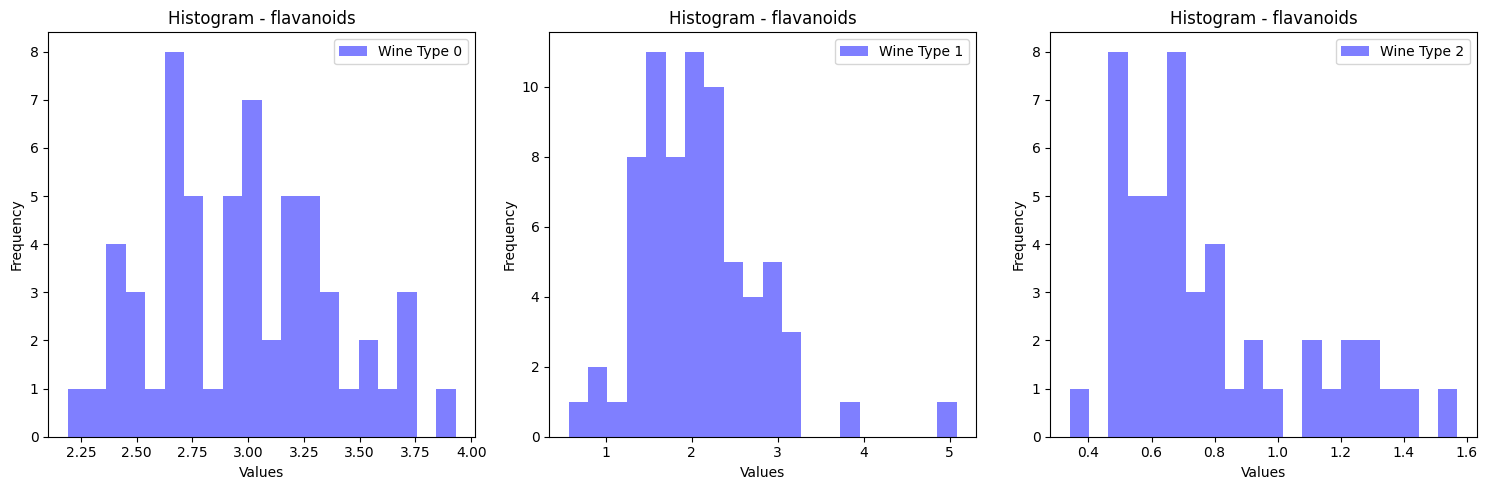

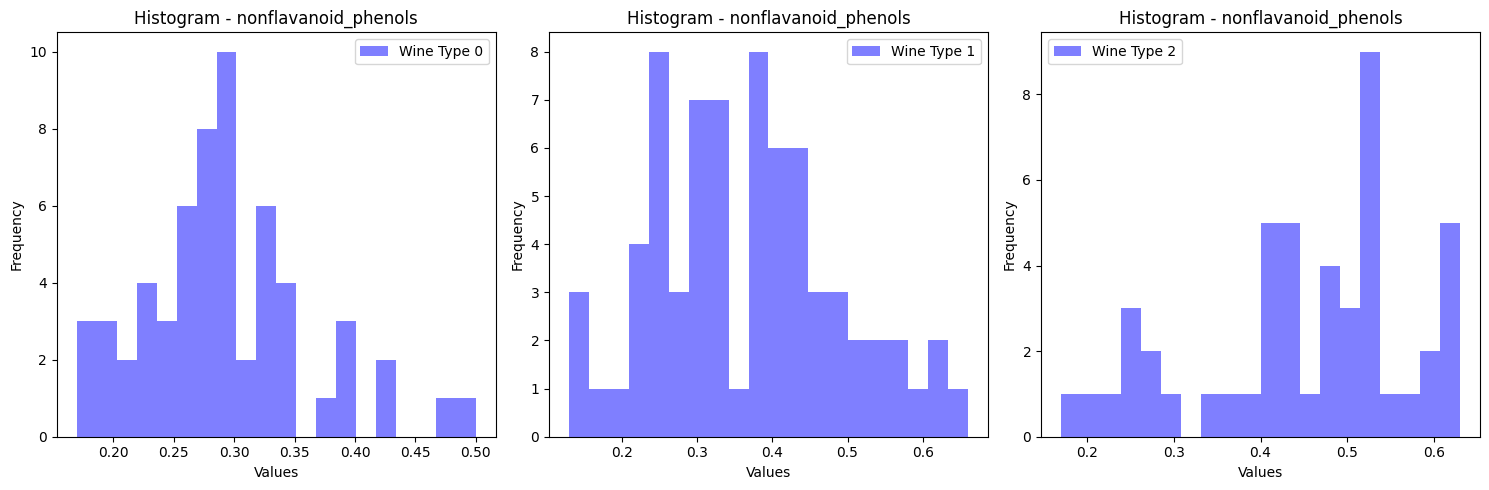

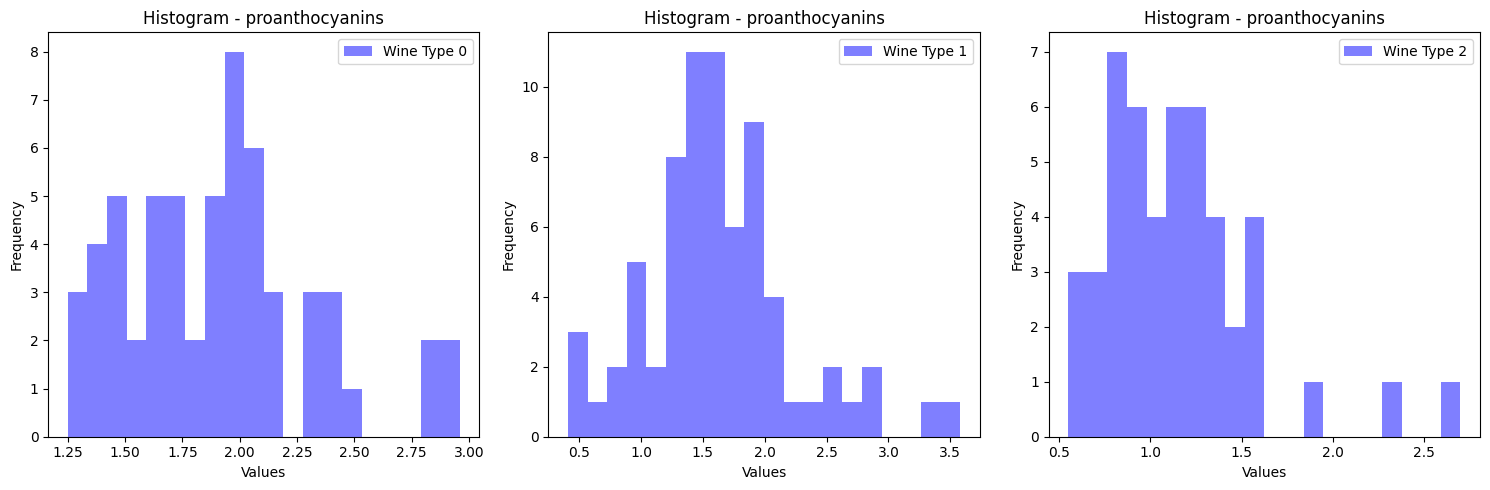

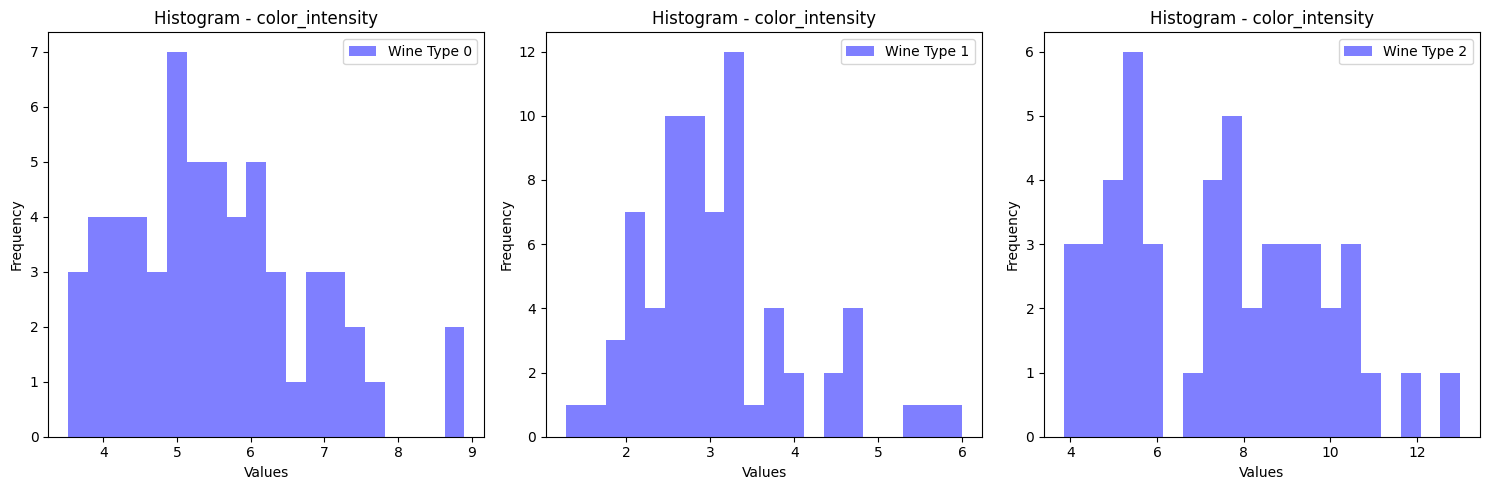

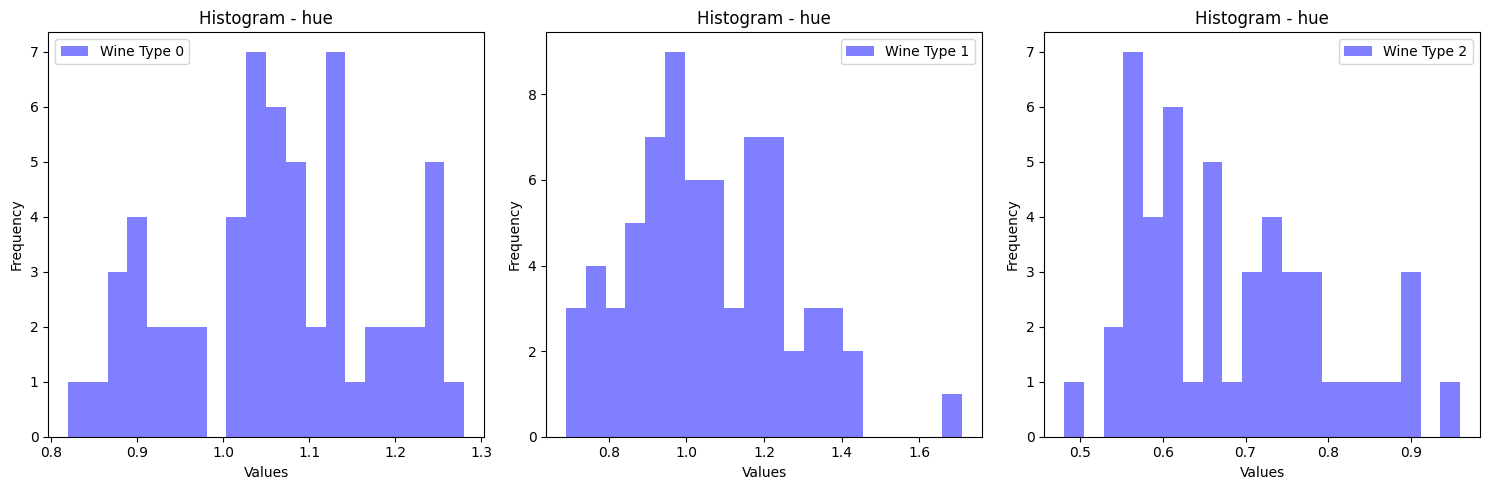

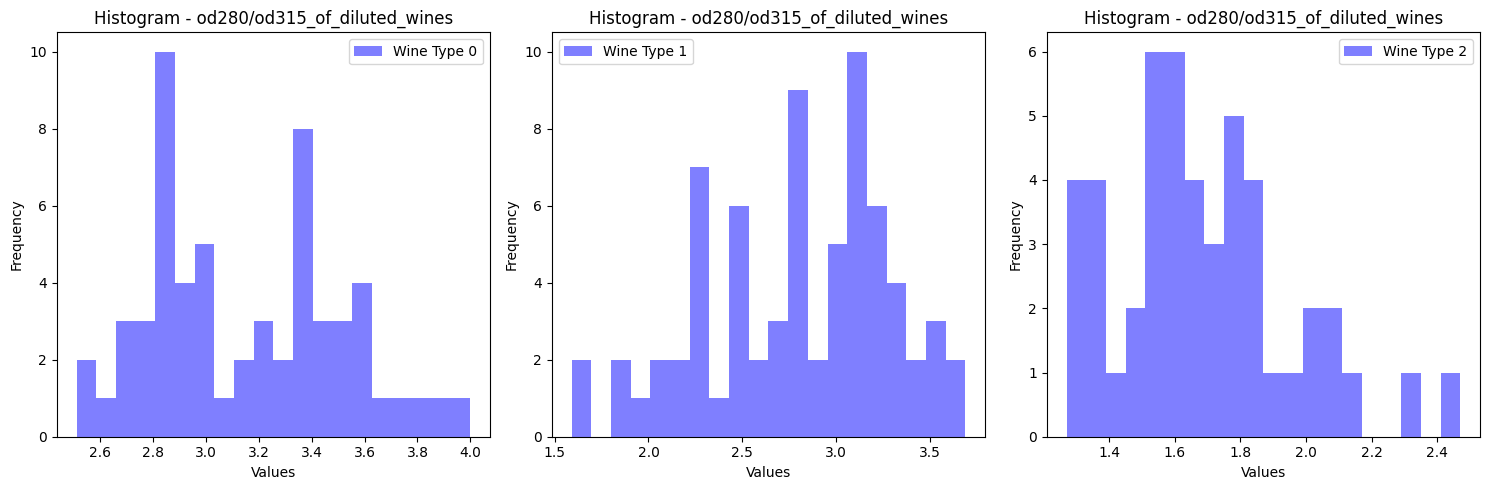

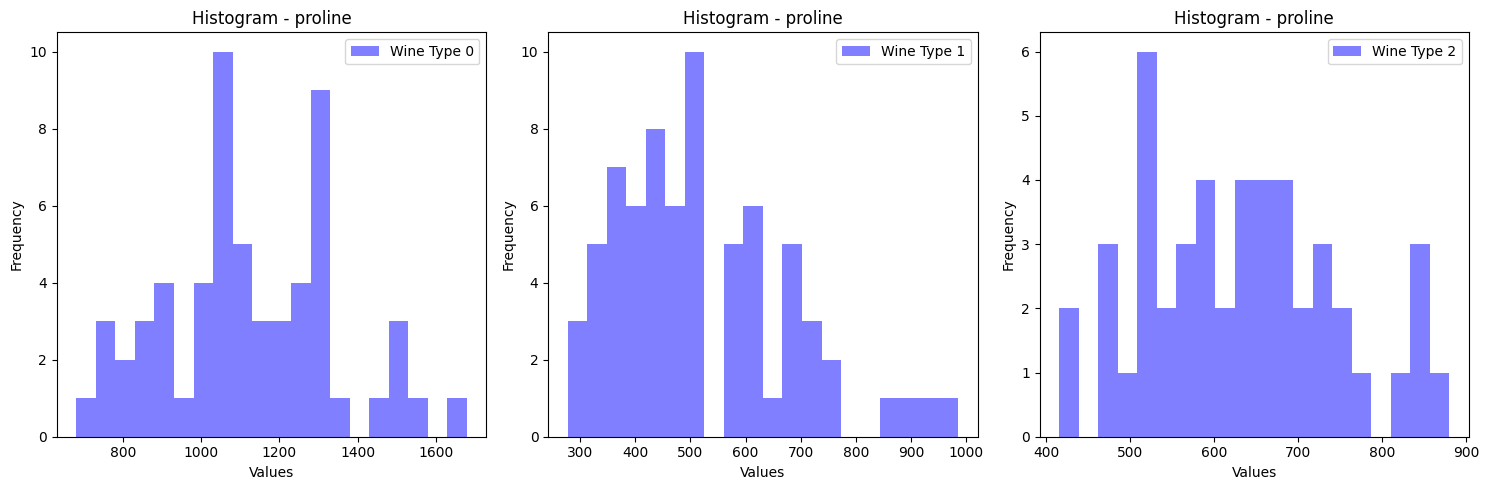

In [249]:
for column in df.columns[:-1]:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    
    for i, dfs in enumerate(dataframes):
        ax = axes[i]
        ax.hist(dfs[column], bins=20, alpha=0.5, label=labels[i], color='b')
        ax.set_title(f'Histogram - {column}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')
        ax.legend()
    # Adjust layout
    plt.tight_layout()

# Show the plots
plt.show()

<big><b>We can observe that our features are continous and normal distributed. 
That is why we are going to use Gaussian Naive Bayes</b></big>

<h2>Model Prediction</h2>

In [279]:
x_train , x_test, y_train , y_test = train_test_split(load_wine().data, load_wine().target, test_size=0.2, random_state=100)

In [280]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [281]:
model = GaussianNB()

In [282]:
model.fit(x_train, y_train)

GaussianNB()

In [283]:
model.score(x_test, y_test)

1.0

<big><b>Lets test MultinominalNB too</b></big>

In [284]:
model1 = MultinomialNB()

In [285]:
model1.fit(x_train, y_train)

MultinomialNB()

In [286]:
model1.score(x_test, y_test)

0.8333333333333334

<big><b>We see that Gaussian Naive Bayes is much better classifying wine types</b></big>